In [1]:
# A notebook to test development of Optopy. 
# Comparisons made with Optopy_dev_test.m invocations of SimTools MATLAB functions

import pylab as pl
import numpy as np
import optopy
reload(optopy)
%matplotlib inline

In [2]:
# Testing HermitePoly function

hnx = optopy.HermitePoly(2,4)
print 'H_2(4)='+str(hnx)

# Testing factorial function

b=5
fac = optopy.factorial(b)
print '5!='+str(fac)

H_2(4)=62.0
5!=120.0


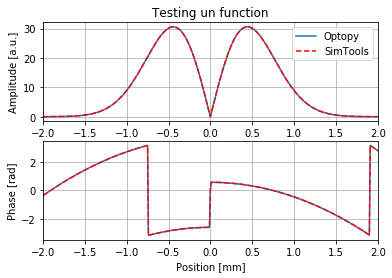

In [2]:
# Testing un function

MATunreal=pl.loadtxt('untestreal.txt')
MATunimag=pl.loadtxt('untestimag.txt')
MATun=MATunreal+1j*MATunimag

lam=1064e-9
q0=1j
x=pl.linspace(-2e-3,2e-3,401)
z=0.4
n=1
q=q0+z
un=optopy.un(lam,q,x,n)
mm=1e3

pl.figure()
pl.subplot(211)
pl.title('Testing un function')
pl.plot(x*mm,abs(un), label='Optopy')
pl.plot(x*mm,abs(MATun),'r--', label='SimTools')
pl.grid()
pl.legend()
pl.xlim(-2,2)
pl.ylabel('Amplitude [a.u.]')
pl.subplot(212)
pl.plot(x*mm,pl.angle(un), label='Optopy')
pl.plot(x*mm,pl.angle(MATun),'r--', label='SimTools')
pl.xlim(-2,2)
pl.ylabel('Phase [rad]')
pl.xlabel('Position [mm]')
pl.grid()
pl.savefig('untest.pdf')

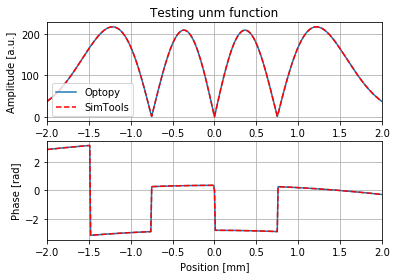

In [13]:
# Testing unm function

w0x=1e-3
w0y=1.5e-3
y=x
zx=z
zy=z
m=2
n=1
qx=1j*pl.pi*w0x**2./lam+zx
qy=1j*pl.pi*w0y**2./lam+zy

MATunmreal=pl.loadtxt('unmtestreal.txt')
MATunmimag=pl.loadtxt('unmtestimag.txt')
MATunm=MATunmreal+1j*MATunmimag


unm=optopy.unm(lam,qx,qy,x,y,n,m)

pl.figure()
pl.subplot(211)
pl.title('Testing unm function')
pl.plot(x*mm,abs(unm), label='Optopy')
pl.plot(x*mm,abs(MATunm),'r--', label='SimTools')
pl.grid()
pl.legend()
pl.xlim(-2,2)
pl.ylabel('Amplitude [a.u.]')
pl.subplot(212)
pl.plot(x*mm,pl.angle(unm), label='Optopy')
pl.plot(x*mm,pl.angle(MATunm),'r--', label='SimTools')
pl.xlim(-2,2)
pl.ylabel('Phase [rad]')
pl.xlabel('Position [mm]')
pl.grid()
pl.savefig('unmtest.pdf')

In [18]:
# Testing the init_gp function
reload(optopy)
#gp=optopy.init_gauss_param(lam,1,q0x=1j,zRx=1)
#gp=optopy.init_gauss_param(lam,1,q0=1,q0x=1)
nr=1
offset=[0,0]

field=optopy.HGfield(lam,[q0,q0],n,m,x,y,offset)




2


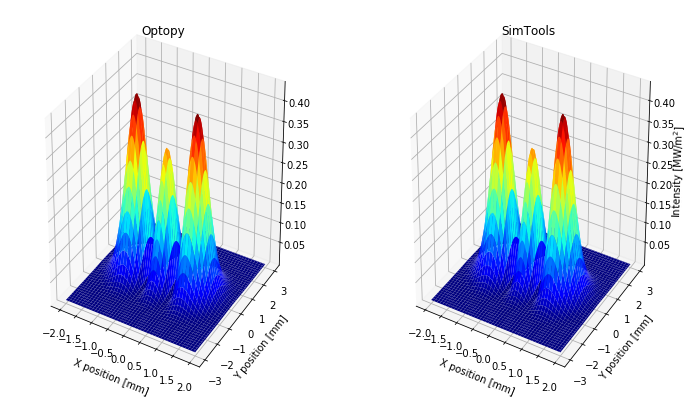

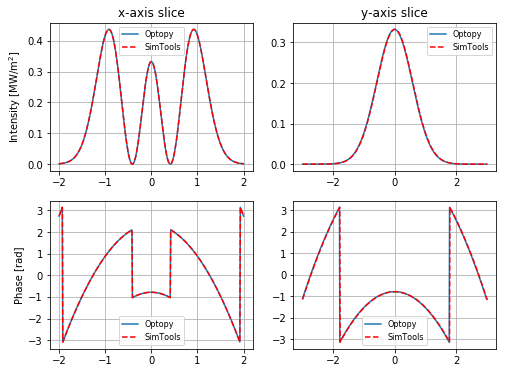

In [28]:
# Testing the HG_field function (easy version that doesn't yet use gp structure)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

reload(optopy)

mode='20'

MATfieldreal=pl.loadtxt('HG'+mode+'fieldtestreal.txt',delimiter=',')
MATfieldimag=pl.loadtxt('HG'+mode+'fieldtestimag.txt',delimiter=',')
MATfield=MATfieldreal+1j*MATfieldimag

qs=[1j+1,2j+2]
nr=1
offset=[0,0,0]
n=int(mode[0])
m=int(mode[1])

x=pl.linspace(-2e-3,2e-3,401)
y=pl.linspace(-3e-3,3e-3,601)
lam=1064e-9

field=optopy.HGfield(lam,qs,n,m,x,y,offset)

X=pl.zeros(field.shape)
Y=pl.zeros(field.shape)

for o, val in enumerate(X[0,:]):
    X[:,o]=x[o]

for l, val in enumerate(Y[:,0]):
    Y[l,:]=y[l]

MWpm=1e-6
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X*mm,Y*mm,abs(field)**2*MWpm,cmap='jet',linewidth=0)
ax.set_title('Optopy')
ax.set_xlabel('X position [mm]')
ax.set_ylabel('Y position [mm]')
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X*mm,Y*mm,abs(MATfield)**2*MWpm,cmap='jet',linewidth=0)
ax.set_title('SimTools')
ax.set_zlabel('Intensity [MW/m$^2$]')
ax.set_xlabel('X position [mm]')
ax.set_ylabel('Y position [mm]')
pl.tight_layout
pl.savefig('HG'+mode+'beamints.pdf')

pl.figure(figsize=(8,6))
pl.subplot(221)
pl.plot(x*mm,abs(field[int(round(len(y)/2)),:])**2*MWpm,label='Optopy')
pl.plot(x*mm,abs(MATfield[int(round(len(y)/2)),:])**2*MWpm,'r--',label='SimTools')
pl.ylabel('Intensity [MW/m$^2$]')
pl.legend(fontsize=8)
pl.title('x-axis slice')
pl.grid()
pl.subplot(222)
pl.plot(y*mm,abs(field[:,int(round(len(x)/2))])**2*MWpm,label='Optopy')
pl.plot(y*mm,abs(MATfield[:,int(round(len(x)/2))])**2*MWpm,'r--',label='SimTools')
pl.legend(fontsize=8)
pl.title('y-axis slice')
pl.grid()
pl.subplot(223)
pl.plot(x*mm,pl.angle(field[int(round(len(y)/2)),:]),label='Optopy')
pl.plot(x*mm,pl.angle(MATfield[int(round(len(y)/2)),:]),'r--',label='SimTools')
pl.ylabel('Phase [rad]')
pl.legend(fontsize=8)
pl.grid()
pl.subplot(224)
pl.plot(y*mm,pl.angle(field[:,int(round(len(x)/2))]),label='Optopy')
pl.plot(y*mm,pl.angle(MATfield[:,int(round(len(x)/2))]),'r--',label='SimTools')
pl.legend(fontsize=8)
pl.grid()
pl.savefig('HG'+mode+'beam_slices.pdf')
print n

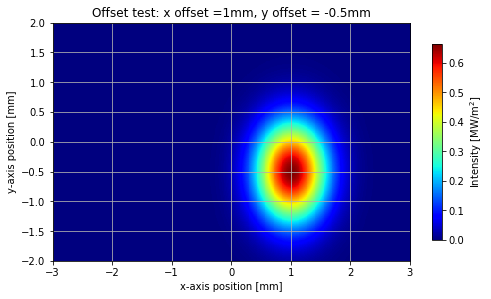

In [23]:
# Test centroid offset
q=[1j-1,2j-2]
nr=1
offset=[1e-3,-0.5e-3,0]
n=0
m=0

x=pl.linspace(-3e-3,3e-3,401)
y=pl.linspace(-2e-3,2e-3,601)
lam=1064e-9

field=optopy.HGfield(lam,qs,n,m,x,y,offset)

X=pl.zeros(field.shape)
Y=pl.zeros(field.shape)

reload(optopy)
# offset=[0,0,0]
field=optopy.HGfield(lam,qs,n,m,x,y,offset)
intensity=abs(field)**2*MWpm

pl.figure(figsize=(8,6))
pl.title('Offset test: x offset =1mm, y offset = -0.5mm')
pl.imshow(np.flipud(intensity), extent=(x.min()*mm, x.max()*mm, y.min()*mm, y.max()*mm),interpolation='nearest',cmap='jet')
pl.xlabel('x-axis position [mm]')
pl.ylabel('y-axis position [mm]')
pl.grid()
cb=pl.colorbar(shrink=0.6)
cb.set_label('Intensity [MW/m$^2$]')
pl.savefig('OffsetTest.pdf')

In [24]:
print np.amax(intensity)
yel=int(round(len(y)/2+offset[1]/y.max()*len(y)/2))
xel=int(round(len(x)/2+offset[0]/x.max()*len(x)/2))

print intensity[yel,xel]


0.6645249883361678
0.6644813877026459


0